# 3.2 线性回归的从零开始

In [5]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np 
import random


In [41]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]  # 真实权重
true_b = 4.2    # 偏差
features = torch.randn(num_examples,num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
epsilon = np.random.normal(0, 0.01, size=lables.size()) # 随机噪声项,服从均值为0、标准差为0.01的正态分布
labels += torch.tensor(epsilon, dtype=torch.float32)

print(features[0], lables[0])

tensor([0.3629, 1.3416]) tensor(8.4963)


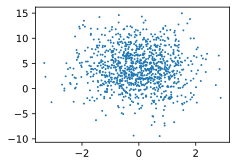

In [42]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), lables.numpy(), 1)

## 读取数据

In [43]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), lables.index_select(0, j)

In [44]:
batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break

tensor([[-0.4243, -0.5503],
        [ 0.5667,  0.0902],
        [ 0.3663,  1.3955],
        [-0.8601,  1.1731],
        [ 0.5765,  2.1980],
        [-1.2279,  1.5124],
        [ 0.6338,  0.3652],
        [-1.6397,  0.7515],
        [-2.0038, -0.0117],
        [-1.7247,  0.4226]]) tensor([ 6.7711, -1.1577,  5.0758,  3.4421,  4.6811, 14.9633,  6.5451,  5.3004,
         7.8977,  5.1990])


## 初始化模型

In [45]:
# 我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
# 之后的模型训练中，需要对这些参数求梯度来迭代参数的值，因此我们要让它们的requires_grad=True
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

## 定义模型

In [46]:
def linreg(x, w, b):
    return torch.mm(x, w) + b

## 定义损失函数

In [47]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) **2 / 2

## 定义优化算法

In [48]:
def sgd(params,lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## 模型训练

In [50]:
lr = 0.01
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y).sum() # 用.sum()将其求和得到一个标量, 求损失
        l.backward()    # 求梯度
        sgd([w, b], lr, batch_size) # 迭代模型参数

        w.grad.data.zero_()  # 梯度清零
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch % d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch  1, loss 7.451507
epoch  2, loss 7.658758
epoch  3, loss 7.670255
epoch  4, loss 7.681028
epoch  5, loss 7.728304
epoch  6, loss 7.634686
epoch  7, loss 7.471446
epoch  8, loss 7.383958
epoch  9, loss 7.594584
epoch  10, loss 7.612948


In [52]:
print(true_w, w)
print(true_b, b)

[2, -3.4] tensor([[-0.2183],
        [-0.1667]], requires_grad=True)
4.2 tensor([4.0427], requires_grad=True)
